In [38]:
import scipy.stats as st
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [82]:
t_stop = 0.1 #seconds
n_cells = 1000
depth_of_mod = 0.3 # depth of modulation
f = 64 # frequency of oscillation

In [83]:
mean_fr = 10 # mean firing rate
std_fr = 2 # std firing rate
a, b = (0 - mean_fr) / std_fr, (100 - mean_fr) / std_fr

In [84]:
d = partial(st.truncnorm.rvs, a=a, b=b, loc=mean_fr, scale=std_fr)

In [85]:
frs = d(size=n_cells)
                    
t = np.arange(0,t_stop,0.001)
z = np.zeros((n_cells,t.shape[0]))
P = 0
for i in np.arange(0,n_cells):
    offset = frs[i]
    A = offset/((1/depth_of_mod)-1)
    z[i,:] = A*np.sin((2 * np.pi * f * t)+P) + offset

(0, 100)

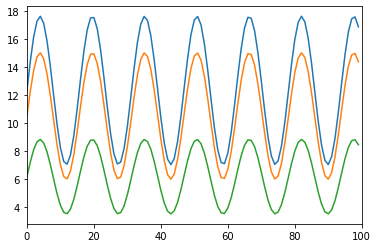

In [86]:
plt.plot(z[0,:])
plt.plot(z[1,:])
plt.plot(z[2,:])

plt.xlim(0,100)

In [87]:
simSpks = []
for i in np.arange(0,n_cells):

    r = z[i,:]

    r[r<0] = 0#Can't have negative firing rates.

    numbPoints = scipy.stats.poisson(r/1000).rvs()#Poisson number of points

    simSpks.append(np.where(numbPoints>0)[0])

Text(0, 0.5, 'node ID')

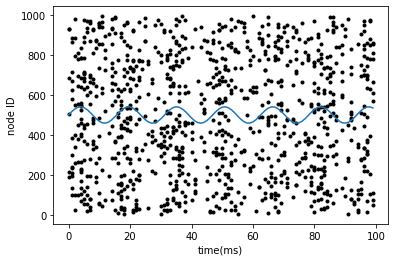

In [89]:
for i in np.arange(0,z.shape[0]):
    plt.plot(simSpks[i],np.ones((simSpks[i].shape[0]))*i,'k.')
plt.plot(10*A*np.sin((2 * np.pi * f * t)+P)+500)
plt.xlabel('time(ms)')
plt.ylabel('node ID')